In [17]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/winequality-red.csv', sep=';')

In [4]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df[["pH"]]

,pH
0,3.51
1,3.20
2,3.26
3,3.16
4,3.51
...,...
1594,3.45
1595,3.52
1596,3.42
1597,3.57


In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
trainDf,testDf=train_test_split(df,train_size=0.8,random_state=2410)
print(trainDf.shape)
print(testDf.shape)

(1279, 12)
(320, 12)


In [10]:
trainX=trainDf.drop("quality",axis=1)
trainY=trainDf["quality"]
testX=testDf.drop("quality",axis=1)
testY=testDf["quality"]


In [11]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


In [12]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler().fit(trainX)
trainXstd=std.transform(trainX)
testXstd=std.transform(testX)

In [13]:
trainSTD=pd.DataFrame(trainXstd,columns=trainX.columns)
testSTD=pd.DataFrame(testXstd,columns=testX.columns)

In [14]:
trainSTD.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.317570,1.223297,-0.465831,-0.015191,-0.212371,-0.076264,0.072250,0.332898,-0.729105,-1.144307,-0.688385
1,-1.270145,-1.143718,-0.106607,-0.159379,-0.339803,0.686153,0.385550,-0.231934,0.700949,1.898076,0.160964
2,-0.192767,1.056214,-0.260560,-0.159379,-0.254848,-0.266868,1.106139,0.061139,-0.469095,-0.718374,-0.877129
3,-0.703104,-0.531079,-0.517149,-0.519848,-0.106177,1.067362,0.166240,-0.226605,1.155966,-0.109897,-0.027780
4,-1.553666,-0.141218,-0.927690,-0.159379,-0.807056,0.114340,1.670079,-1.633357,2.066001,-0.170745,2.425894


In [15]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression().fit(trainSTD,trainY) # indep & dep

In [19]:
testPredict=lm.predict(testSTD)
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error




In [20]:
mean_absolute_error(testY,testPredict)

0.4770960931254457

In [21]:
mean_squared_error(testY,testPredict)

0.38694541216452655

In [22]:
np.sqrt(mean_squared_error(testY,testPredict))

0.6220493647328373

In [23]:
mean_absolute_percentage_error(testY,testPredict)

0.08650378175036443

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the local file
wine_data = pd.read_csv('/content/winequality-red.csv', sep=';')

# Explore the data
print(wine_data.head())
print(wine_data.info())
print(wine_data.describe())



# Evaluate the model




   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [26]:
# Split the data into features and target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   0  11   6   0   0]
 [  0   0 147  46   2   0]
 [  0   0  46 138  16   0]
 [  0   0   0  32  28   1]
 [  0   0   0   1   4   1]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.72      0.75      0.73       195
           6       0.62      0.69      0.65       200
           7       0.56      0.46      0.50        61
           8       0.50      0.17      0.25         6

    accuracy                           0.65       480
   macro avg       0.40      0.34      0.36       480
weighted avg       0.63      0.65      0.64       480


Accuracy Score:
0.6541666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


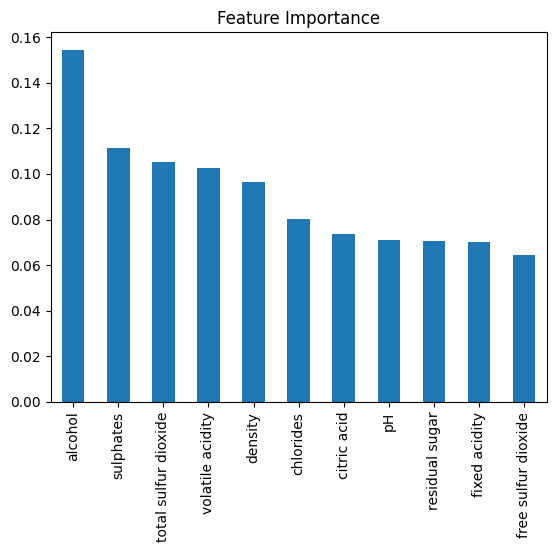

In [28]:
# Visualize feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()